Reading and displaying input image using matplotlib

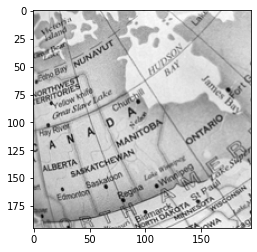

In [1]:
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 

img_globe = mpimg.imread('Globe.png')
plt.imshow(img_globe,'gray')

# Generating kernel

In [2]:
import numpy as np
def generate_kernel(sigma):
    k= int(np.ceil(6*sigma+1));  #kernel size
    if k==1:
        return np.ones((k,k)); #to avoid division by 0 when sigma=0.0
    #if kernel size is even then consider the next odd value
    if k%2==0:
        k = k+1;
    #creating empty kernel grid
    kernel = np.zeros((k,k));
    d=k//2 
    for i in range(k):
        for j in range(k):
            kernel[i,j]=np.exp((-(i-d)**2-(j-d)**2)/(2*sigma**2))
    kernel=kernel/np.sum(kernel)
    return kernel

# Space Variant blur

In [3]:
def space_variant_blur(image,sigma_matrix):
    [x,y]=np.shape(image)
    blurred_image = np.zeros((x, y))
    kernel_sizes = np.ceil(6*sigma_matrix+1)
    kernel_sizes[kernel_sizes % 2 == 0]+=1
    kernel_sizes=kernel_sizes.astype(int)
    kmax=np.max(kernel_sizes) #considering the max kernel size
    for i in range(kmax, x+kmax):
        for j in range(kmax, y+kmax):
            sigma=sigma_matrix[i-kmax,j-kmax]
            kernel = generate_kernel(sigma)
            k=len(kernel)
            d1=k//2
            zero_padded_image = np.zeros((x+2*kmax, y+2*kmax))
            zero_padded_image[kmax:x+kmax, kmax:y+kmax] = image #fit the image to the center of the zero padded image
            patch = zero_padded_image[i-d1:i+d1+1, j-d1:j+d1+1] #patch of the input image on which kernel needs to be applied for this iteration
            blurred_image[i-kmax, j-kmax] = np.sum(kernel*patch) #apply kernel and sum these values 
    return blurred_image

# Solving for A and B
 The standard deviation at each pixel is given by $\sigma(m,n)=Aexp(\frac{-((m-\frac{N}{2})^2+(n-\frac{N}{2})^2)}{B})$
  where $0\leq m,n \leq N-1$
  given $\tag1 \sigma(\frac{N}{2},\frac{N}{2})=2.0$ and $\tag2 \sigma(0,0)=0.01$ 
  From (1) and (2), we get $A=2$ and $B=\frac{\frac{N^2}{2}}{-ln(0.005)}$ 

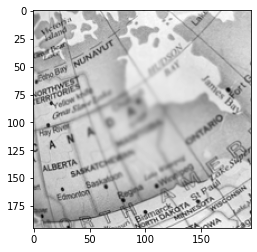

In [4]:
import math
A=2.0
[x,y]=np.shape(img_globe)
N=x #[m,n] is size of sigma matrix which lies between 0 and N-1 this implies N=x
B = (N*N/2)/(-np.log(0.005))
sigma_matrix = np.zeros((N,N))
for i in range(N):
     for j in range(N):
        sigma_matrix[i,j] = A*(np.exp(-((i-N/2)**2+(j-N/2)**2)/B))
blurred_image_space_var=space_variant_blur(img_globe,sigma_matrix)
plt.imshow(blurred_image_space_var,'gray')
#print(np.shape(sigma_matrix))


Reading and displaying nautilus image

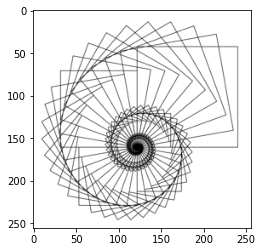

In [5]:
img_nautilus = mpimg.imread('Nautilus.png')
plt.imshow(img_nautilus,'gray')

# Space invariant blur

In [6]:
def space_invariant_blur(image,kernel) :
    k = len(kernel)
    d=k//2 #center of kernel
    if d==0:
        return image
    [x,y] = np.shape(image)
    blurred_image = np.zeros((x,y))
    zero_padded_image = np.zeros((x+2*d, y+2*d))
    zero_padded_image[d:-d, d:-d] = image #fit the image to the center of the zero padded image
    for i in range(d, x+d):
        for j in range(d, y+d):
            patch = zero_padded_image[i-d:i+d+1, j-d:j+d+1] #patch of the input image on which kernel needs to be applied for this iteration
            blurred_image[i-d, j-d] = np.sum(kernel*patch) #apply kernel and sum these values 
    return blurred_image

In [7]:
kernel=generate_kernel(1.0)
space_invar_blurred_image=space_invariant_blur(img_nautilus,kernel)

# Space variant blur using a constant sigma

In [8]:
#space variant blur  using a constant sigma matrix
#here given sigma is 1.0
sigma = 1.0
[x1,y1]=np.shape(img_nautilus)
# constant blur matrix
sigma_matrix = sigma*np.ones((x1, y1))
constant_sigma_space_var=space_variant_blur(img_nautilus,sigma_matrix)

Plotting 

(-0.5, 255.5, 255.5, -0.5)

<Figure size 432x288 with 0 Axes>

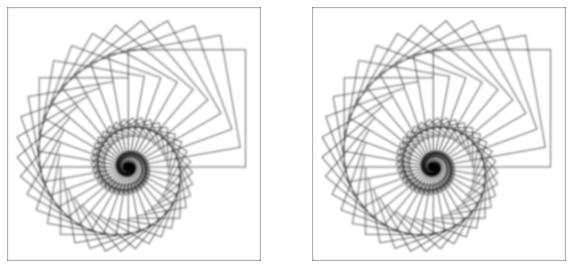

In [9]:
plt.figure()
plt. subplots(1,2,figsize=(10,10)) 
plt.subplot(1,2,1)
plt.imshow(constant_sigma_space_var,'gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(space_invar_blurred_image,'gray')
plt.axis('off')

Difference between space invariant blur and space variant blur using constant sigma

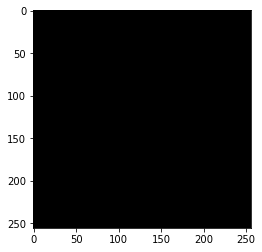

In [10]:
plt.imshow(constant_sigma_space_var-space_invar_blurred_image, 'gray')

As we can see from the above plot the difference is zero, hence both are same
